In [1]:
from ultralytics import YOLO
import cv2
model = YOLO("best.pt") 
import matplotlib.pyplot as plt
%matplotlib inline


image 1/1 C:\DeepLearning\JupyterWorkspace\ \car_2.jpg: 640x480 1 licence, 259.6ms
Speed: 17.5ms preprocess, 259.6ms inference, 6785.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict
Class: licence, Box: [1388 2136 2268 2311]


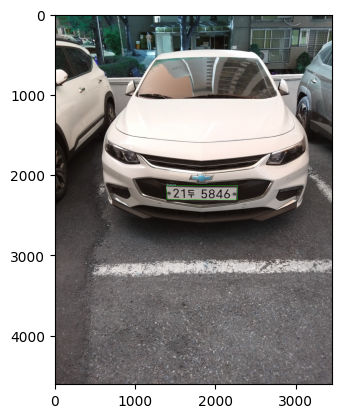

In [2]:
results = model.predict('car_2.jpg', save=True, conf=0.5)
img = cv2.imread('car_2.jpg')
#results = model.predict('1.jpg', save=True, conf=0.5)
#img = cv2.imread('1.jpg')
img_crop = None
color1 = (155, 200, 230)
for result in results:
    boxes = result.boxes.cpu().numpy()  # Get boxes on CPU in numpy format
    for box in boxes:  # Iterate over boxes
        r = box.xyxy[0].astype(int)  # Get corner points as int
        class_id = int(box.cls[0])  # Get class ID
        class_name = model.names[class_id]  # Get class name using the class ID
        print(f"Class: {class_name}, Box: {r}")  # Print class name and box coordinates
        cv2.rectangle(img, r[:2], r[2:], (0, 255, 0), 2)  # Draw boxes on the image
        cv2.putText(img, class_name, (r[0], r[1]), 1, 2, color1, 2, cv2.LINE_AA)
        img_crop = img[r[:2], r[2:]].copy()

plt.imshow(img)
plt.show()

[1388 2136 2268 2311]


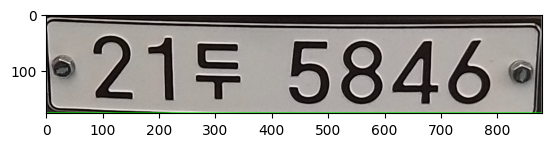

In [3]:
for result in results:
    boxes = result.boxes.cpu().numpy()  # Get boxes on CPU in numpy format
    for box in boxes:
        print(r)

img_crop =  img[r[1]:r[3], r[0]:r[2]].copy()
plt.imshow(img_crop)

In [4]:
import cv2
imgxx = cv2.imread('jj.jpg') 
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION']='python'
from paddleocr import PaddleOCR
ocr = PaddleOCR(lang="korean")
result = ocr.ocr(img_crop, cls=False)

ocr_result = result[0]
print(ocr_result)

[2024/04/16 10:52:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Lenovo/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Lenovo/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch

In [5]:
type(ocr_result)

list

In [6]:
len(ocr_result)

2

list
<class 'list'>
[91, 47]
(91, 47)
(347, 145)
license : 21두, prob : %f 0.9984843134880066
list
<class 'list'>
[441, 56]
(441, 56)
(779, 151)
license : 5846, prob : %f 0.9999372959136963
final license number : 21두5846


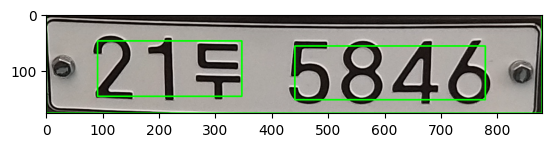

In [8]:
color = (0, 255, 0)
license_x = ''
for rectObj in ocr_result:
    for rect in rectObj:
        if isinstance(rect, list):
            print ('list')
            print (type(rect))
            print ([int(s) for s in rect[0]])
            #r = box.xyxy[0].astype(int)
            pt1 = tuple([int(s) for s in rect[0]])
            #pt1 = tuple(rect[0].astype(int))
            print (pt1)
            pt2 = (int(rect[1][0]), int(rect[3][1]))
            print (pt2)
            cv2.rectangle(img_crop, pt1, pt2, color, 2)
        if isinstance(rect, tuple):
            print ('license : %s, prob : %%f' % rect[0], rect[1])
            license_x = license_x + rect[0]
        
print ('final license number : ' + license_x)
plt.imshow(img_crop)

In [9]:
type(ocr_result[0])

list

In [10]:
len(ocr_result[0])

2

In [11]:
st = ocr_result[0][0]

In [12]:
st

[[91.0, 47.0], [347.0, 47.0], [347.0, 145.0], [91.0, 145.0]]